In [90]:
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
risk_qa = pd.read_excel("risk_data.xlsx")

In [18]:
risk_qa.head()

,客戶編號,風險等級,風險等級分類,適性評量填寫日期,適性版號,題目序號,KYC_QUESTION,ANS_ORDER,ANS_ITEM,答題得分,客戶職業與任職部門,AGENT代碼
0,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A0,是否為其他國家稅務居住者?,1,1.否,0,NaN,9999999999
1,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A01,職業／行業別,8,8.退休人士,0,NaN,9999999999
2,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A02,職務,1,1.基層職員,0,NaN,9999999999
3,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A03,任職單位,1,1.任職公司／機構,0,寶豐,9999999999
4,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A03,任職單位,2,2.任職部門,0,營建,9999999999


In [8]:
uni_id = np.unique(risk_qa["客戶編號"])

In [41]:
attr_dict = defaultdict(lambda: defaultdict(list))
max_ans_dict = defaultdict(int) # record max answer num for each question (for one-hot array)

for index, row in risk_qa.iterrows():
    attr_dict[row["客戶編號"]][row["題目序號"]].append(row["ANS_ORDER"])
    if max_ans_dict[row["題目序號"]]<row["ANS_ORDER"]:
        max_ans_dict[row["題目序號"]] = row["ANS_ORDER"] 

In [45]:
question_list = list(max_ans_dict.keys())

In [67]:
# create feature matrix (one-hot encoding)
feature_matrix = []
id_list = []
for user in attr_dict.keys():
    single_user_feature = []
    for q in question_list:
        ans = np.array(attr_dict[user][q])-1
        one_hot = np.zeros(max_ans_dict[q])
        if len(ans)!=0:
            one_hot[ans] = 1
        single_user_feature.append(one_hot)
    merge_feature = np.hstack(single_user_feature)
    feature_matrix.append(merge_feature)
    id_list.append(user)
feature_matrix = np.vstack(feature_matrix)

In [69]:
feature_matrix.shape

(1884, 121)

In [94]:
X = feature_matrix
X_embedded = TSNE(n_components=2, perplexity=80).fit_transform(X)
X_embedded.shape


(1884, 2)

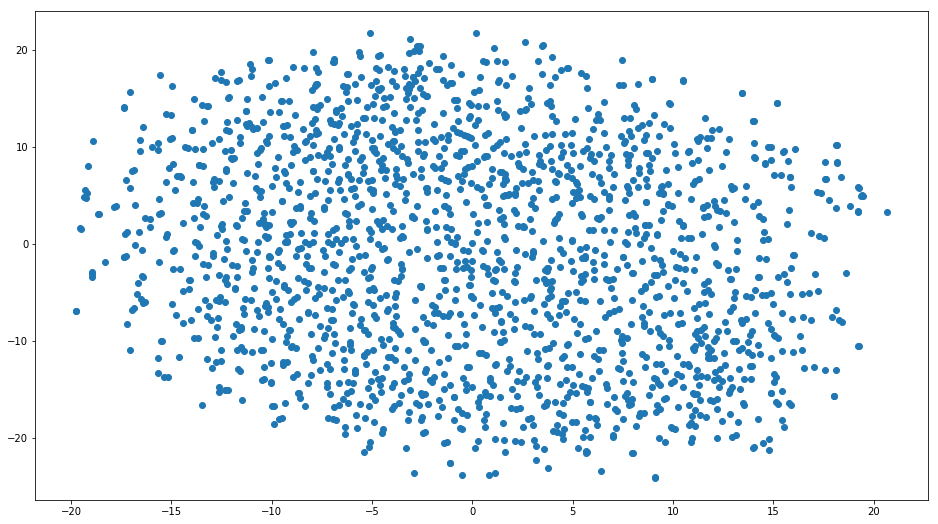

In [95]:
plt.figure(figsize=(16,9))
# cm = plt.cm.get_cmap("tab20", 18)
sc = plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.show()

# 實際投資行為

In [116]:
invest = pd.read_excel("invest_data.xlsx")

In [117]:
customer = list(set(invest["客戶"]))
customer_money = invest.groupby('客戶',as_index=False, sort=False).sum()

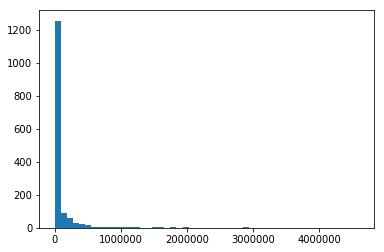

In [154]:
plt.hist(customer_money["金額"], bins=50)
plt.show()

In [140]:
vis_vec = []
amount = []
for c in customer:
    vis_vec.append(X_embedded[id_list.index(c)])
    amount.append(customer_money.loc[customer_money["客戶"]==c, "金額"].values[0])
vis_vec = np.vstack(vis_vec)

In [148]:
amount = (np.array(amount)-min(amount))/(max(amount)-min(amount))

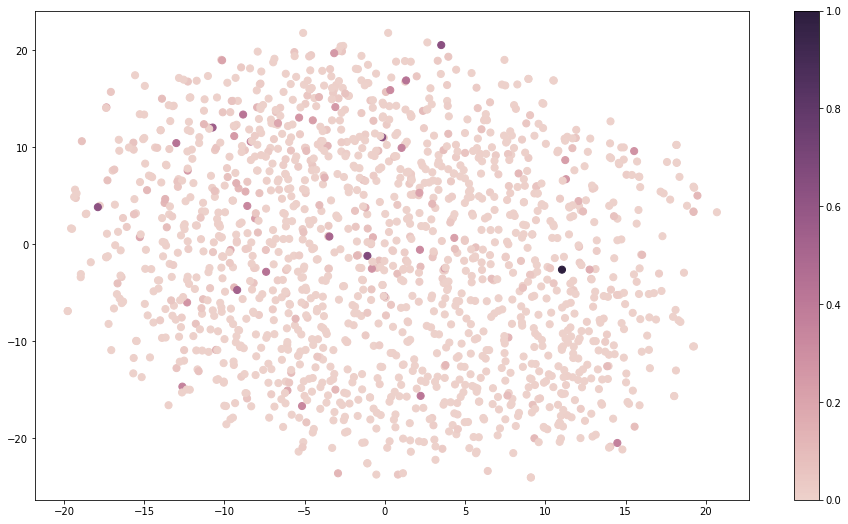

In [149]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots(figsize=(16,9))
points = ax.scatter(vis_vec[:,0], vis_vec[:,1], c=amount, s=50, cmap=cmap)
f.colorbar(points)

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])